In [163]:
import opendatasets as od
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

dataset_url = 'https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu/data'
od.download(dataset_url)
data_dir = './bank-customer-churn-prediction-dlu'
train_csv = data_dir + '/train.csv'
test_csv = data_dir + '/test.csv'
sample_submission = data_dir + '/sample_submission.csv'

train_df = pd.read_csv(train_csv)



Skipping, found downloaded files in ".\bank-customer-churn-prediction-dlu" (use force=True to force download)


In [49]:
train_df.Balance.describe()

count      3932.000000
mean      42976.856106
std       59889.720559
min           0.000000
25%           0.000000
50%           0.000000
75%      109330.530000
max      209767.310000
Name: Balance, dtype: float64

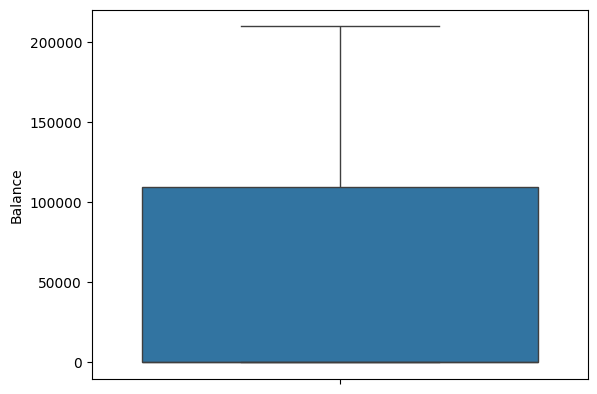

In [48]:
sns.boxplot(train_df.Balance)
plt.show()

In [54]:
train_df[train_df['Balance']>0].shape

(1383, 14)

In [55]:
train_df.shape

(3932, 14)

In [62]:
train_df[train_df['Balance']==0]['Exited'].value_counts()

Exited
0.0    2151
1.0     398
Name: count, dtype: int64

In [63]:
train_df[train_df['Balance']>0]['Exited'].value_counts()

Exited
0.0    981
1.0    402
Name: count, dtype: int64

In [64]:


def bi_cat_countplot(df, column, hue_column):
    unique_hue_values = df[hue_column].unique()
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(14,6)

    pltname = f'Нормалізований розподіл значень за категорією: {column}'
    proportions = df.groupby(hue_column)[column].value_counts(normalize=True)
    proportions = (proportions*100).round(2)
    ax = proportions.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
        ).plot.bar(ax=axes[0], title=pltname)

    # анотація значень в барплоті
    for container in ax.containers:
        ax.bar_label(container, fmt='{:,.1f}%')

    pltname = f'Кількість даних за категорією: {column}'
    counts = df.groupby(hue_column)[column].value_counts()
    ax = counts.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
        ).plot.bar(ax=axes[1], title=pltname)

    for container in ax.containers:
      ax.bar_label(container)


def uni_cat_target_compare(df, column):
    bi_cat_countplot(df, column, hue_column='Exited')

In [ ]:
#розбити дані на до 40 і після 40 

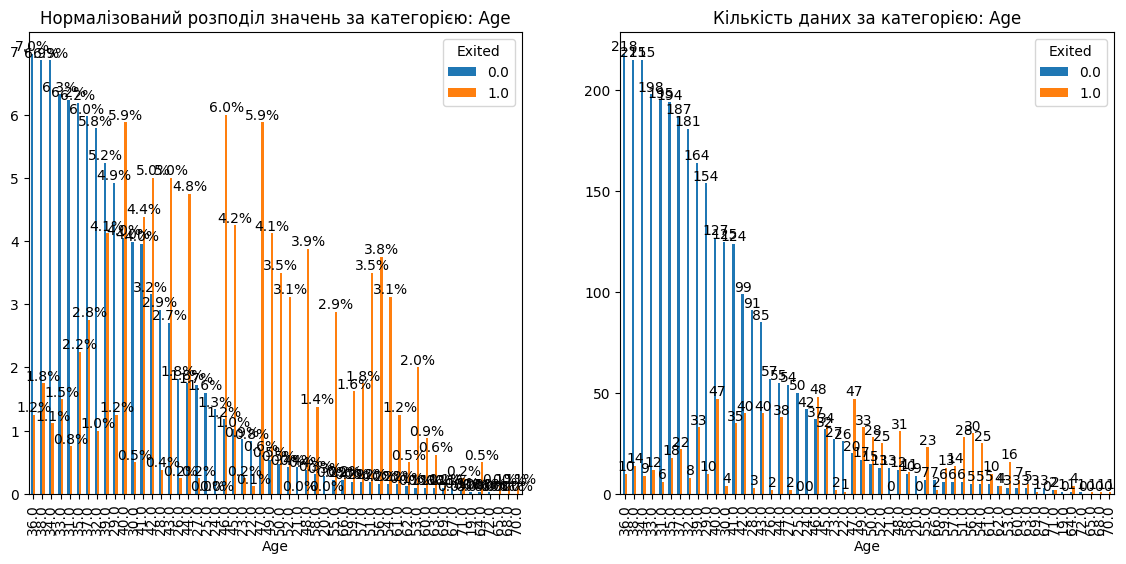

In [65]:
uni_cat_target_compare(train_df, 'Age')

In [138]:
train_df[train_df['Age']<30]['Exited'].value_counts()

Exited
0.0    1563
1.0      74
Name: count, dtype: int64

In [139]:
train_df[(train_df['Age']<40) & (train_df['Age']>30)]['Exited'].value_counts()

Exited
0.0    5338
1.0     434
Name: count, dtype: int64

In [136]:
train_df[(train_df['Age']<35) & (train_df['Age']>30)]['Exited'].value_counts()

Exited
0.0    2338
1.0     114
Name: count, dtype: int64

In [137]:
train_df[(train_df['Age']<40) & (train_df['Age']>35)]['Exited'].value_counts()

Exited
0.0    2360
1.0     249
Name: count, dtype: int64

In [140]:
train_df[(train_df['Age']<50) & (train_df['Age']>40)]['Exited'].value_counts()

Exited
0.0    1554
1.0    1069
Name: count, dtype: int64

In [141]:
train_df[(train_df['Age']<60) & (train_df['Age']>50)]['Exited'].value_counts()

Exited
1.0    522
0.0    159
Name: count, dtype: int64

In [142]:
train_df[train_df['Age']>60]['Exited'].value_counts()

Exited
0.0    100
1.0     78
Name: count, dtype: int64

In [144]:
def age_cat(years):
    if years < 30:
        return '0-30'
    elif years>=30 and years<35:
        return '30-35'
    elif years>=35 and years<=40:
        return '35-40'
    elif years > 40:
        return '40+'

In [145]:

train_df['Age_Category'] = train_df['Age'].apply(age_cat)

In [120]:
train_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Category
7180,7180,15652218.0,Mays,682.0,France,Male,30.0,1.0,131394.56,1.0,1.0,1.0,143952.24,0.0,30-40
10393,10393,15592937.0,Ch'eng,684.0,France,Female,39.0,2.0,178058.06,1.0,1.0,0.0,145518.31,0.0,30-40
80,80,15774586.0,Ch'in,705.0,Germany,Male,35.0,6.0,116320.68,2.0,1.0,0.0,174431.01,0.0,30-40
3365,3365,15780572.0,K?,669.0,Spain,Male,58.0,0.0,0.00,2.0,0.0,1.0,51565.98,0.0,40+
12236,12236,15642099.0,Trevisani,707.0,France,Male,21.0,3.0,0.00,2.0,1.0,1.0,148564.76,0.0,0-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9493,9493,15711299.0,Onyekachi,633.0,France,Female,33.0,4.0,0.00,2.0,0.0,0.0,123537.05,0.0,30-40
8463,8463,15778418.0,Tsao,673.0,France,Female,40.0,1.0,0.00,1.0,1.0,1.0,47832.82,0.0,30-40
8143,8143,15585192.0,Hsia,621.0,France,Male,29.0,8.0,0.00,2.0,1.0,1.0,133535.29,0.0,0-30
11512,11512,15694450.0,Onuora,590.0,Spain,Male,42.0,7.0,0.00,2.0,0.0,0.0,72643.95,0.0,40+


In [146]:
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df['Exited'])

input_cols = ['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Age_Category']
target_col = 'Exited'

train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
val_inputs = train_df[input_cols].copy()
val_targets = train_df[target_col].copy()

numeric_cols = [
 'CreditScore',
 'Balance',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']
categorical_cols = ['Geography', 'Gender','NumOfProducts','Age_Category']


In [104]:
train_df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Age_Category'],
      dtype='object')

In [164]:
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df['Exited'])

input_cols = list(train_df.columns)[1:-1]
target_col = 'Exited'

train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
val_inputs = train_df[input_cols].copy()
val_targets = train_df[target_col].copy()

numeric_cols = [
 'Age',
 'Balance',
 'CreditScore',
 #'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']
categorical_cols = ['Geography', 'Gender','NumOfProducts' ]



In [26]:
numeric_cols

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [165]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(train_inputs[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])




#ordenc = OrdinalEncoder(categories=[[1, 2, 3, 4]]) # визначаємо порядок категорій
#ordenc.fit(train_inputs[['NumOfProducts']])

#train_inputs['NumOfProducts_Codes'] = ordenc.transform(train_inputs[['NumOfProducts']])
#val_inputs['NumOfProducts_Codes'] = ordenc.transform(val_inputs[['NumOfProducts']])
#train_inputs.to_parquet('train_inputs.parquet')
#val_inputs.to_parquet('val_inputs.parquet')
#%%time
#pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
#pd.DataFrame(val_targets).to_parquet('val_targets.parquet')

In [33]:
ordenc.get_feature_names_out

<bound method OneToOneFeatureMixin.get_feature_names_out of OrdinalEncoder(categories=[[1, 2, 3, 4]])>

In [123]:
train_inputs

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1.0,NumOfProducts_2.0,NumOfProducts_3.0,NumOfProducts_4.0,Age_Category_0-30,Age_Category_30-40,Age_Category_40+
7611,7611,15693326.0,Shih,0.374702,France,Male,41.0,0.2,0.000000,2.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
14633,14633,15677796.0,Trevisano,0.651551,Germany,Female,40.0,0.5,0.619614,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8169,8169,15794849.0,Nkemdilim,0.665871,France,Male,33.0,0.3,0.000000,2.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6609,6609,15638269.0,Dyer,0.517900,France,Female,37.0,0.8,0.000000,2.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7553,7553,15720508.0,Li Fonti,0.338902,France,Male,44.0,0.3,0.000000,2.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,1992,15713144.0,Chin,0.513126,France,Male,29.0,0.3,0.000000,2.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9347,9347,15761023.0,Tuan,0.467780,France,Male,35.0,0.6,0.000000,2.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9131,9131,15784092.0,Chibugo,0.625298,France,Female,34.0,0.1,0.000000,2.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7057,7057,15675888.0,Chukwukere,0.687351,France,Female,29.0,0.7,0.326230,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [7]:

new_df = pd.concat([train_inputs[numeric_cols], train_targets], axis = 1)
#new_df.corr()

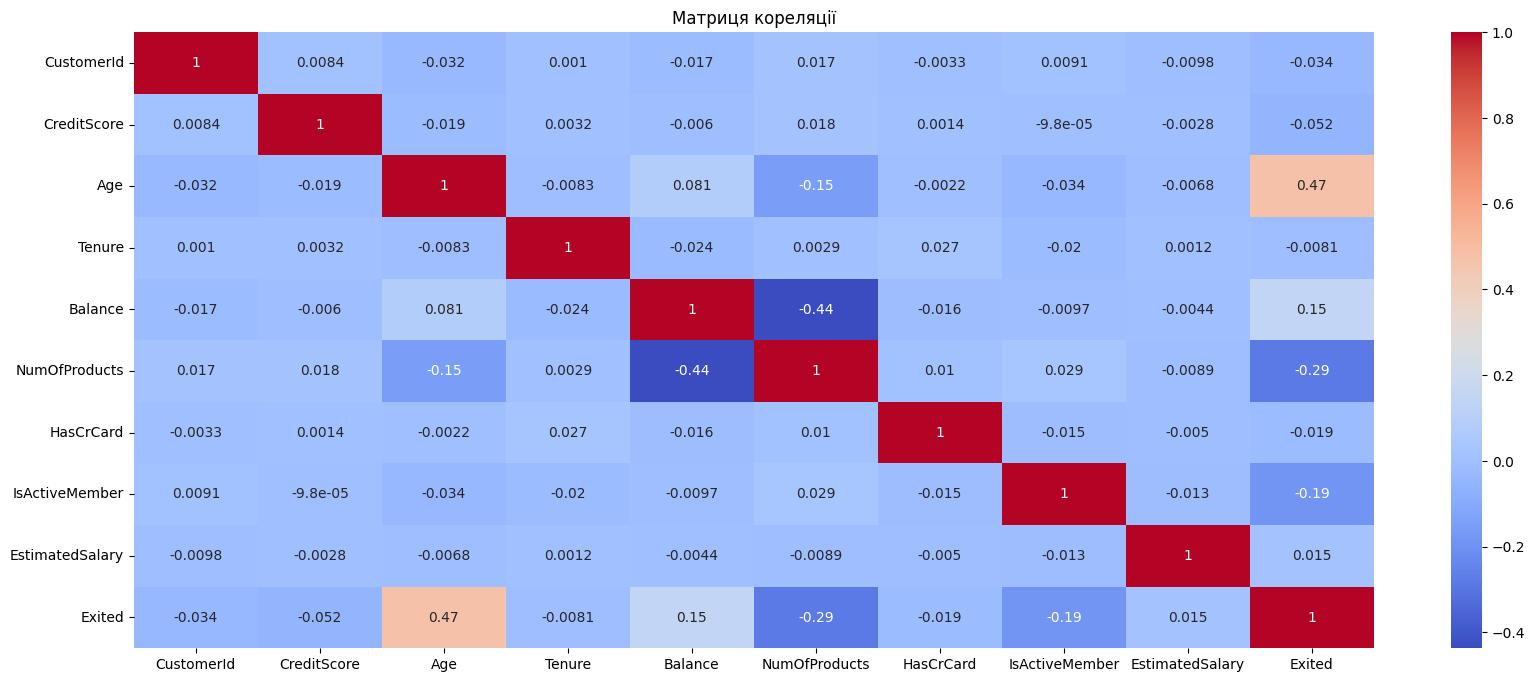

In [6]:
plt.figure(figsize=(20, 8))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm')
plt.title('Матриця кореляції')
plt.show()

accurcy score for train dataframe is 0.8876666666666667
accurcy score for validation dataframe is 0.8876666666666667
confusion matrix for train dataframe is [[9124  434]
 [ 914 1528]]
confusion matrix for validation dataframe is [[9124  434]
 [ 914 1528]]
f1_score for train dataframe is 0.6939146230699365
f1_score for train dataframe is 0.6939146230699365
AUROC for Training: 0.92


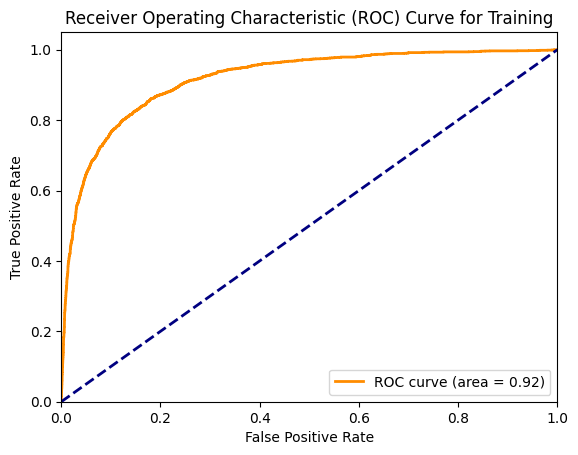

AUROC for Validation: 0.92


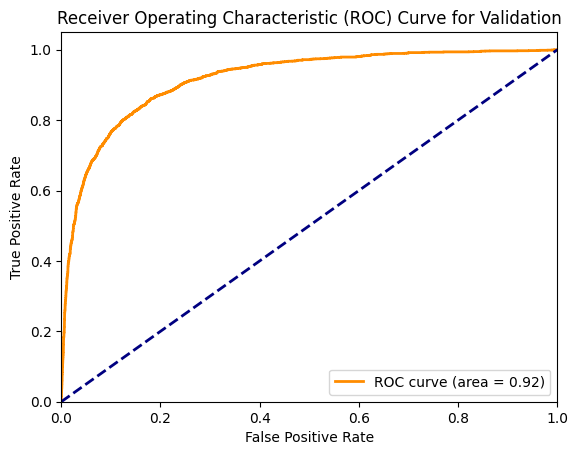

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc


X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
model = LogisticRegression(solver='liblinear')
model.fit(X_train, train_targets)

train_preds = model.predict(X_train)
val_preds = model.predict(X_val)

print(f'accurcy score for train dataframe is {accuracy_score(train_targets, train_preds)}')
print(f'accurcy score for validation dataframe is {accuracy_score(val_targets, val_preds)}')

print(f'confusion matrix for train dataframe is {confusion_matrix(train_targets, train_preds)}')
print(f'confusion matrix for validation dataframe is {confusion_matrix(val_targets, val_preds)}')

print(f'f1_score for train dataframe is {f1_score(train_targets, train_preds)}')
print(f'f1_score for train dataframe is {f1_score(val_targets, val_preds)}')


def compute_auroc_and_build_roc(inputs, targets, name=''):
  # Predict probabilities
  y_pred_proba = model.predict_proba(inputs)[:, 1]

  # Compute ROC curve
  fpr, tpr, thresholds = roc_curve(targets, y_pred_proba)

    # Compute AUROC
  roc_auc = auc(fpr, tpr)
  print(f'AUROC for {name}: {roc_auc:.2f}')

  # Plot the ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
  plt.legend(loc="lower right")
  plt.show()

compute_auroc_and_build_roc(X_train, train_targets, 'Training')   
compute_auroc_and_build_roc(X_val, val_targets, 'Validation')

In [110]:
def all_null(inputs):
    return np.full(len(inputs), 0)

In [111]:
accuracy_score(train_targets, all_null(X_train))

0.7965

In [112]:
accuracy_score(val_targets, all_null(X_val))

0.7965

In [737]:
import joblib
aussie_rain = {
    'model': model,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

joblib.dump(aussie_rain, 'log_reg.joblib')
model_2 = joblib.load('log_reg.joblib')

In [157]:
import warnings
warnings.filterwarnings("ignore")

def predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, input_df: pd.DataFrame):
    #input_df['Age_Category'] = input_df['Age'].apply(age_cat)
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    prob = model.predict_proba(X_input)[:,1]
    return prob

test_raw_df = pd.read_csv(test_csv)
test_raw_df['Exited'] = predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, test_raw_df)
sample_submission = pd.read_csv(sample_submission)
merged_df = sample_submission.merge(test_raw_df, on='id', how='left')
merged_df['Exited'] = merged_df['Exited_y']
merged_df = merged_df[['id', 'Exited']]

In [158]:
merged_df.to_csv('submission_log_reg7.csv', index=False)